In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
from sklearn.externals.six.moves import zip
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels

### 1.剃除非數值資料
### 2.剔除nan
### 3.原本資料是有按類別排列，亂序後分割測試資料
### 4.類別轉化成離散數值

In [3]:
def Data_preprocessing (DataFrame):
    # Drop Non-numeric data
    train_drop = train.dropna(axis = 1).drop(["Unnamed: 0","user_name","raw_timestamp_part_1","raw_timestamp_part_2","cvtd_timestamp","new_window","num_window"],axis=1)
    # shuffle data 
    train_shuffle = train_drop.sample(frac=1).reset_index(drop=True)
    # map class labels words to numbers
    class_mapping = {'A':0,'B':1,'C':2,'D':3,'E':4}
    labels = train_shuffle ["classe"].map(class_mapping).values
    # drop classe make it become traing data
    data = train_shuffle.drop(["classe"],axis=1).values
    return data,labels

### 繪製confusion_matrix

In [5]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [6]:
# Setting data_path Input trining data
dir_data = 'C:/Users/IRIS168'
f_train = os.path.join(dir_data, 'pml-training.csv')
print('Path of read in data: %s' % (f_train))
train = pd.read_csv(f_train)
train.shape

Path of read in data: C:/Users/IRIS168\pml-training.csv


C:\Users\IRIS168\Anaconda3\envs\tensorflow_gpu\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (11,14,19,22,25,70,73,86,87,89,90,94,97,100) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(19622, 160)

In [7]:
data,labels =  Data_preprocessing (train)

In [8]:
# Partition data
n_split = 15000
data_train, data_test = data[:n_split], data[n_split:]
labels_train, labels_test = labels[:n_split], labels[n_split:]

In [23]:
# Training randomforest
clf = RandomForestClassifier(n_estimators=200, max_depth=12,random_state=0)
clf.fit(data_train, labels_train)
print(clf.feature_importances_)
y_pred = clf.predict(data_test)

[0.0953448  0.04606453 0.06060397 0.01709917 0.00510059 0.00691384
 0.01781397 0.00694201 0.00805136 0.02944661 0.01448047 0.02962749
 0.02854278 0.0200126  0.00956136 0.01439503 0.00445498 0.00589073
 0.00587842 0.00184514 0.01443446 0.00795412 0.00561276 0.01697151
 0.01370358 0.01012332 0.02876454 0.01134595 0.01438579 0.01903991
 0.00708396 0.01477907 0.00330729 0.01846748 0.03058903 0.01982952
 0.03315466 0.0454398  0.04914612 0.03774131 0.06033399 0.00853668
 0.0069785  0.00273316 0.00520863 0.00297065 0.0215731  0.00587838
 0.01371026 0.01282831 0.01133783 0.01796648]


Confusion matrix, without normalization
[[1325    1    1    5    1]
 [  16  834   13    3    0]
 [   0   10  781    3    0]
 [   0    0   60  730    0]
 [   0    0    9   15  815]]
Normalized confusion matrix
[[9.93998500e-01 7.50187547e-04 7.50187547e-04 3.75093773e-03
  7.50187547e-04]
 [1.84757506e-02 9.63048499e-01 1.50115473e-02 3.46420323e-03
  0.00000000e+00]
 [0.00000000e+00 1.25944584e-02 9.83627204e-01 3.77833753e-03
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 7.59493671e-02 9.24050633e-01
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.07270560e-02 1.78784267e-02
  9.71394517e-01]]


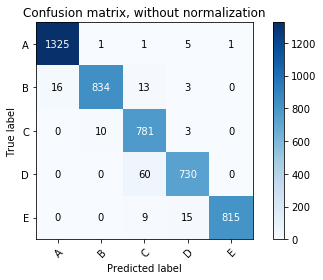

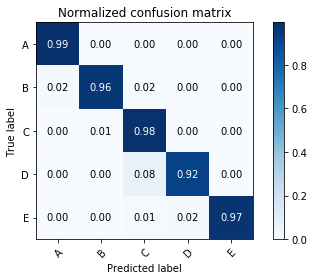

In [24]:
# Plot Randomforest non-normalized confusion matrix
plot_confusion_matrix(labels_test, y_pred, classes=['A','B','C','D','E'],
                      title='Confusion matrix, without normalization')
# Plot Randomforest normalized confusion matrix
plot_confusion_matrix(labels_test, y_pred, classes=['A','B','C','D','E'], normalize=True,
                      title='Normalized confusion matrix')

### Result Prediction

In [25]:
# Input Testing data
f_test = os.path.join(dir_data, 'pml-testing.csv')
print('Path of read in data: %s' % (f_test))
test = pd.read_csv(f_test)
test.shape

Path of read in data: C:/Users/IRIS168\pml-testing.csv


(20, 160)

In [26]:
# Drop Non-numeric data
test = test.dropna(axis = 1).drop(["Unnamed: 0","user_name","raw_timestamp_part_1","raw_timestamp_part_2","cvtd_timestamp","new_window","num_window","problem_id"],axis=1).values
test

array([[ 1.23e+02,  2.70e+01, -4.75e+00, ..., -7.14e+02,  4.19e+02,
         6.17e+02],
       [ 1.02e+00,  4.87e+00, -8.89e+01, ..., -2.37e+02,  7.91e+02,
         8.73e+02],
       [ 8.70e-01,  1.82e+00, -8.85e+01, ..., -5.10e+01,  6.98e+02,
         7.83e+02],
       ...,
       [ 9.20e-01,  5.31e+00, -9.31e+01, ..., -5.00e+02, -2.32e+02,
         3.29e+02],
       [ 1.23e+02,  2.67e+01, -2.68e+00, ..., -6.14e+02, -4.60e+01,
         4.71e+02],
       [ 1.40e+00,  3.20e+00, -8.87e+01, ...,  7.00e+01, -7.03e+02,
         7.40e+01]])

In [27]:
y_pred = clf.predict(test)

In [28]:
y_pred

array([1, 0, 1, 0, 0, 4, 3, 3, 0, 0, 1, 2, 1, 0, 4, 4, 0, 1, 1, 1],
      dtype=int64)